<a href="https://colab.research.google.com/github/TranNhatHan/ExercisePythonInClass/blob/main/ThongKeMoTa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Truy cập các thư viện cần thiết

In [21]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import numpy as np

# Đọc dữ liệu từ file và thể hiện một số thông số cơ bản

In [12]:
rawdata = pd.read_csv("/content/drive/MyDrive/Inc_Exp_Data.csv", dtype={'Highest_Qualified_Member': 'category'})
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


1.	Mthly_HH:_Income	Monthly Household Income
2.	Mthly_HH_Expense:	Monthly Household Expense (Dependent Variable)
3.	No_of_Fly_Members:	Number of Family Members
4.	Emi_or_Rent_Amt:	Monthly EMI or Rent Amount
5.	Annual_HH_Income:	Annual Household Income
6.	Highest_Qualified_Member:	Education Level of the Highest Qualified Member in the household
7.	No_of_Earning_Members:	Number of Earning Members

Xem các thông tin tổng quát của dữ liệu

In [13]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Mthly_HH_Income           50 non-null     int64   
 1   Mthly_HH_Expense          50 non-null     int64   
 2   No_of_Fly_Members         50 non-null     int64   
 3   Emi_or_Rent_Amt           50 non-null     int64   
 4   Annual_HH_Income          50 non-null     int64   
 5   Highest_Qualified_Member  50 non-null     category
 6   No_of_Earning_Members     50 non-null     int64   
dtypes: category(1), int64(6)
memory usage: 2.7 KB


# Boxplot thể hiện tổng quan về tập dữ liệu và cho biết các giá trị ngoại lai

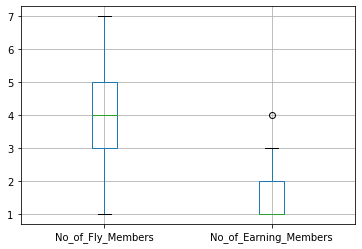

In [14]:
rawdata.boxplot(column = ['No_of_Fly_Members', 'No_of_Earning_Members'])

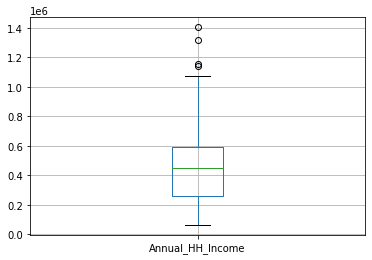

In [15]:
rawdata.boxplot(column = 'Annual_HH_Income')

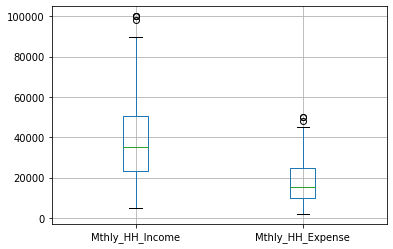

In [16]:
rawdata.boxplot(column = ['Mthly_HH_Income', "Mthly_HH_Expense"])

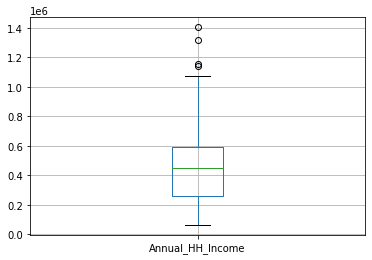

In [17]:
rawdata.boxplot(column = "Annual_HH_Income")

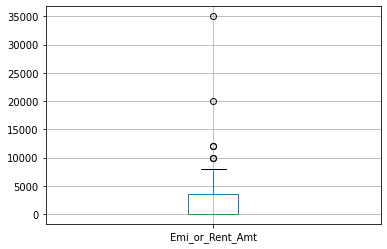

In [18]:
rawdata.boxplot(column = "Emi_or_Rent_Amt")

# Loại bỏ giá trị ngoại lai

In [19]:
outline_data = pd.DataFrame()
for column in ["Mthly_HH_Income", "Emi_or_Rent_Amt", "Annual_HH_Income"]:
    outline_data[column] = df[column]

In [22]:
df = rawdata[(np.abs(ss.zscore(outline_data)) < 3).all(axis=1)]

In [38]:
numeric = pd.DataFrame()
for column in ["Mthly_HH_Income", "Mthly_HH_Expense", "Emi_or_Rent_Amt",	"Annual_HH_Income"]:
    numeric[column] = df[column]

# Tính các giá trị hướng tâm và độ phân tán

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,49.0,42100.000000,26082.489337,5000.0,24000.0,35000.0,50500.0,100000.0
Mthly_HH_Expense,49.0,18875.510204,12208.595514,2000.0,10000.0,15000.0,25000.0,50000.0
No_of_Fly_Members,49.0,4.081633,1.525297,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,49.0,2408.163265,4252.050326,0.0,0.0,0.0,3500.0,20000.0
Annual_HH_Income,49.0,496603.102041,320014.718273,64200.0,261000.0,449400.0,596160.0,1404000.0
No_of_Earning_Members,49.0,1.469388,0.738863,1.0,1.0,1.0,2.0,4.0


# Lập các bảng mô tả dữ liệu

In [29]:
correlation = df.corr(method='pearson')
correlation

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.651706,0.440509,0.218038,0.969669,0.339666
Mthly_HH_Expense,0.651706,1.000000,0.639931,0.638261,0.592966,0.310320
No_of_Fly_Members,0.440509,0.639931,1.000000,0.238885,0.422833,0.593812
Emi_or_Rent_Amt,0.218038,0.638261,0.238885,1.000000,0.165057,-0.045675
Annual_HH_Income,0.969669,0.592966,0.422833,0.165057,1.000000,0.287757
No_of_Earning_Members,0.339666,0.310320,0.593812,-0.045675,0.287757,1.000000


# Biểu đồ mô tả dữ liệu

Biểu đồ nhiệt

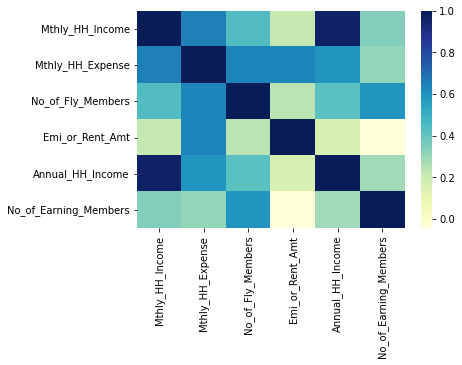

In [30]:
sns.heatmap(correlation, cmap="YlGnBu")
plt.show()

Biểu đồ pairpair

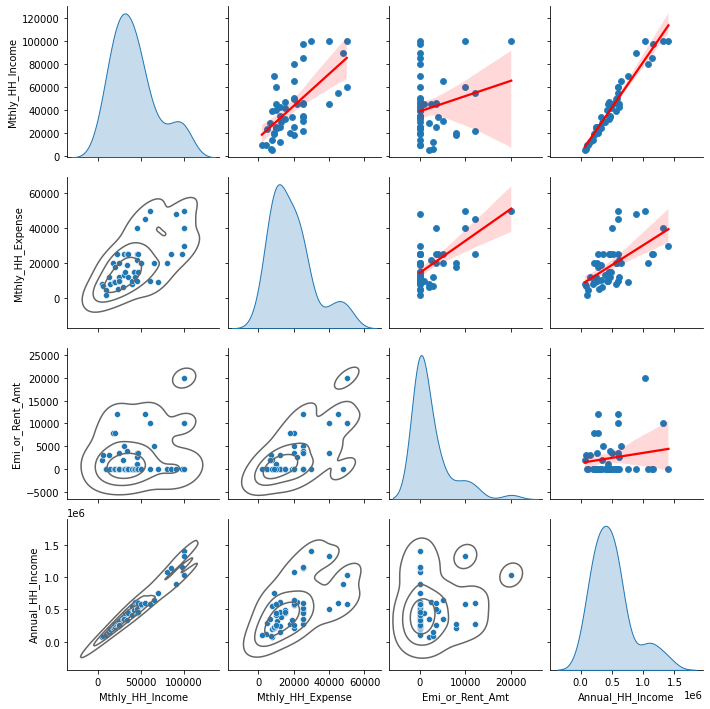

In [56]:
g = sns.pairplot(numeric, diag_kind = 'kde')
g.map_lower(sns.kdeplot, levels=4, color="0.4")
g.map_upper(sns.regplot, line_kws={'color': 'red'})
plt.show()

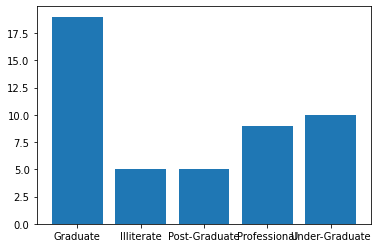

In [ ]:
r = ndf["Highest_Qualified_Member"]
r_categories = r.cat.categories.to_list()
r_category_counts = r.value_counts(sort=False).to_numpy()
plt.bar(r_categories, r_category_counts)
plt.show()

In [11]:
uc = ndf["Mthly_HH_Expense"]
plt.hist(uc, 7, color ='green')
plt.show()

NameError: ignored

In [ ]:
pd.crosstab(ndf["No_of_Fly_Members"], ndf['Highest_Qualified_Member'])

Highest_Qualified_Member,Graduate,Illiterate,Post-Graduate,Professional,Under-Graduate
No_of_Fly_Members,,,,,
1,0,1,0,0,0
2,4,1,1,0,2
3,3,1,1,2,1
4,5,1,1,4,4
5,2,0,0,1,2
6,5,1,1,2,1
7,0,0,1,0,0


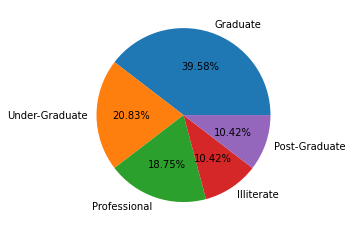

In [ ]:
operator_counts = ndf.Highest_Qualified_Member.value_counts()
operators = operator_counts.index
counts = operator_counts.values
cumperc = counts.cumsum()/counts.sum()*100
plt.xticks(rotation=90)
plt.pie(counts[:10], labels = operators[:10], autopct='%1.2f%%')
plt.show()